# Overview

The following data is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). This dataset includes 100,000 rows and 9 features:

1. gender
2. age
3. hypertension
4. heart_disease
5. smoking_history
6. body mass index (bmi)
7. HbA1c_level
8. blood_glucose_level
9. diabetes

Healthcare professionals may find this data useful in identifying patients at risk of developing diabetes and in developing personalized treatment plans. Furthermore, researchers can explore the relationships between various medical and demographic factors to determine the likelihood of developing diabetes.

In [ ]:
# Descargar datos desde kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset
!unzip -q diabetes-prediction-dataset.zip -d .

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN

In [4]:
# Cargar los datos
data = pd.read_csv("diabetes_prediction_dataset.csv")
data = data[:100000]
data.head()

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Verificar los tipos de datos y nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


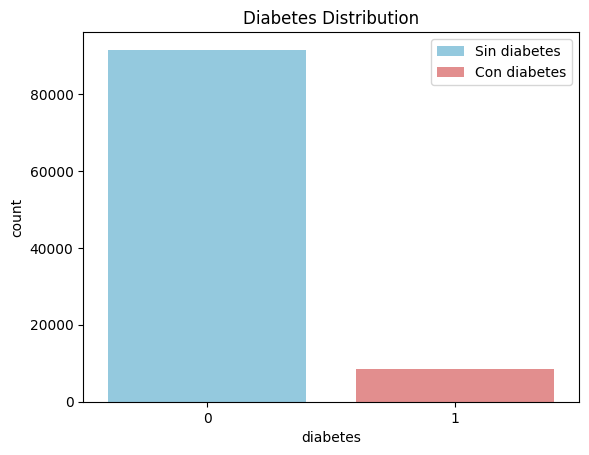

In [ ]:
# Verificar la distribución de las clases
sns.countplot(data = data, x = 'diabetes', palette=['skyblue', 'lightcoral'], hue='diabetes')
plt.legend(['Sin diabetes', 'Con diabetes'])
plt.title('Diabetes Distribution')
plt.show()

In [5]:
# Codificar las variables categóricas (gender y smoking_history) en númericas
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])

In [6]:
# Verificar que los datos han sido codificados correctamente
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [7]:
# Dividir los datos en características (X) y salida (y)
X = data.drop('diabetes', axis=1)
y = data[['diabetes']]

In [8]:
# Dividir 70% de los datos para entrenamiento y validacion, 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [9]:
# Escalar las características
scaler = StandardScaler()
X = scaler.fit_transform(X_train)

In [10]:
# Aplicar sobre y submuestreo con SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

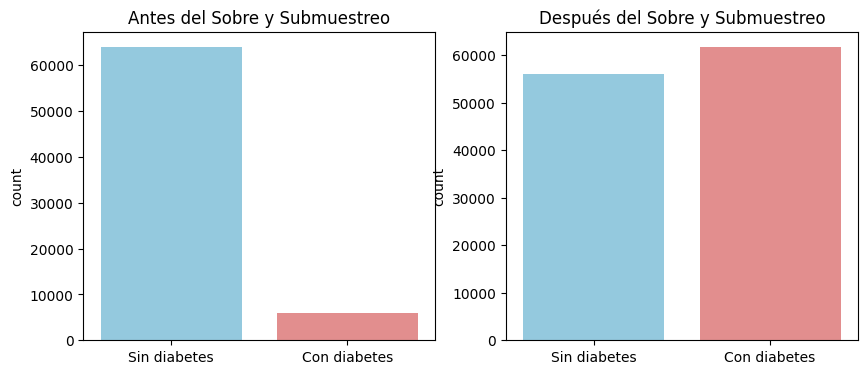

In [11]:
# Verificar la distribución antes y despues del sobre y submuestreo
distribution_original = y_train['diabetes'].value_counts()
distribution_resampled = y_resampled['diabetes'].value_counts()[::-1]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(x=['Sin diabetes', 'Con diabetes'], y=distribution_original, palette=['skyblue', 'lightcoral'], ax=ax[0], hue=[0, 1], dodge=False)
ax[0].set_title('Antes del Sobre y Submuestreo')
ax[0].get_legend().remove()

sns.barplot(x=['Sin diabetes', 'Con diabetes'], y=distribution_resampled, palette=['skyblue', 'lightcoral'], ax=ax[1], hue=[0, 1], dodge=False)
ax[1].set_title('Después del Sobre y Submuestreo')
ax[1].get_legend().remove()

plt.show()

In [12]:
# Entrenar el modelo
rand_forest = RandomForestClassifier(random_state = 42)
rand_forest.fit(X_resampled, np.ravel(y_resampled))

# Predecir con el conjunto de prueba para evaluar el modelo
y_pred_rf = rand_forest.predict(X_test)

# Evaluar el modelo
class_report_rand_forest = classification_report(y_test, y_pred_rf, target_names = ['Sin diabetes', 'Con diabetes'])

print('Random Forest - Reporte:\n', class_report_rand_forest)

Random Forest - Reporte:
               precision    recall  f1-score   support

Sin diabetes       0.98      0.94      0.96     27467
Con diabetes       0.57      0.84      0.68      2533

    accuracy                           0.93     30000
   macro avg       0.78      0.89      0.82     30000
weighted avg       0.95      0.93      0.94     30000

